# Notebook 1

This notebook explores:

- How to create Bell states;
- How to measure in the bell basis;
- How to perform a teleportation;
- Entropy and alike's

In [1]:
#8/03
import numpy as np
from qiskit.visualization import *
from qiskit import *
import qiskit.tools.jupyter
from jupyterthemes import jtplot
from matplotlib import pyplot as plt

jtplot.style(theme='onedork')


%qiskit_version_table
%matplotlib inline

## How to create Bell States?

[Source](https://quantumcomputing.stackexchange.com/questions/2258/how-to-implement-the-4-bell-states-on-the-ibm-q-composer)

In [2]:
# Create the registers
circuit1 = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))
circuit2 = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))
circuit3 = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))
circuit4 = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))
state_sim = Aer.get_backend("statevector_simulator")
#---------------------------------------------------#
circuit1.h(0)
circuit1.cx(0, 1)
#----------------------------------------------------#
circuit2.x(0)
circuit2.h(0)
circuit2.cx(0, 1)
#---------------------------------------------------#
circuit3.x(1)
circuit3.h(0)
circuit3.cx(0, 1)
#---------------------------------------------------#
circuit4.x(0)
circuit4.x(1)
circuit4.h(0)
circuit4.cx(0, 1)

In [3]:
results1 = execute(circuit1, backend=state_sim).result()
outstate1 = results1.get_statevector()
circuit1.draw()

┌───┐     
q0_0: |0>┤ H ├──■──
         └───┘┌─┴─┐
q0_1: |0>─────┤ X ├
              └───┘
 c0_0: 0 ══════════
                   
 c0_1: 0 ══════════

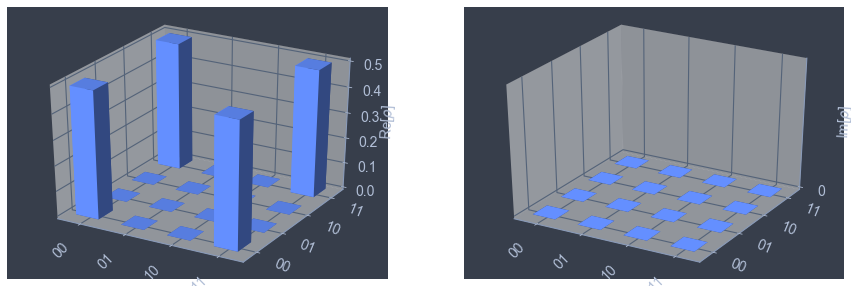

In [4]:
plot_state_city(outstate1)

In [5]:
results2 = execute(circuit2, backend=state_sim).result()
outstate2 = results2.get_statevector()
circuit2.draw()

┌───┐┌───┐     
q1_0: |0>┤ X ├┤ H ├──■──
         └───┘└───┘┌─┴─┐
q1_1: |0>──────────┤ X ├
                   └───┘
 c1_0: 0 ═══════════════
                        
 c1_1: 0 ═══════════════

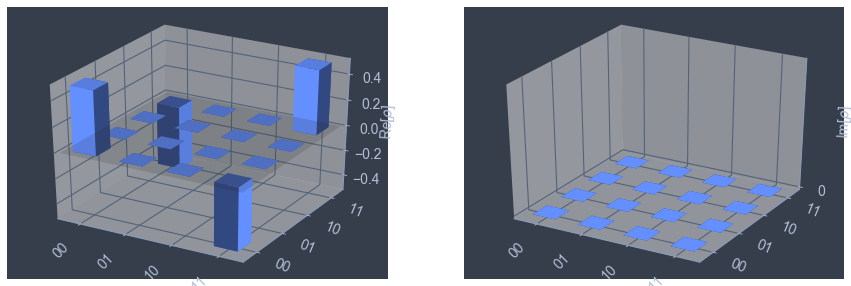

In [6]:
plot_state_city(outstate2)

In [7]:
results3 = execute(circuit3, backend=state_sim).result()
outstate3 = results3.get_statevector()
circuit3.draw()

┌───┐     
q2_0: |0>┤ H ├──■──
         ├───┤┌─┴─┐
q2_1: |0>┤ X ├┤ X ├
         └───┘└───┘
 c2_0: 0 ══════════
                   
 c2_1: 0 ══════════

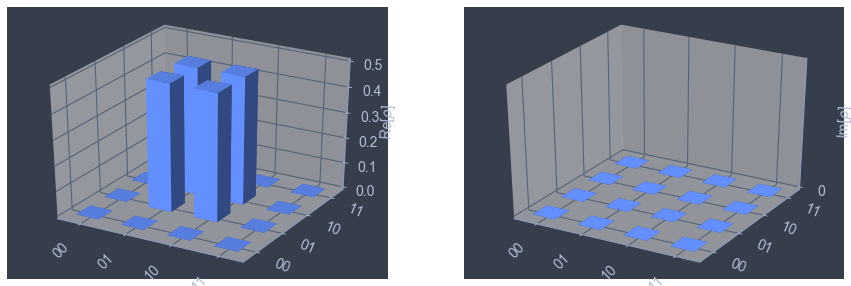

In [8]:
plot_state_city(outstate3)

In [9]:
results4 = execute(circuit4, backend=state_sim).result()
outstate4 = results4.get_statevector()
circuit4.draw()

┌───┐┌───┐     
q3_0: |0>┤ X ├┤ H ├──■──
         ├───┤└───┘┌─┴─┐
q3_1: |0>┤ X ├─────┤ X ├
         └───┘     └───┘
 c3_0: 0 ═══════════════
                        
 c3_1: 0 ═══════════════

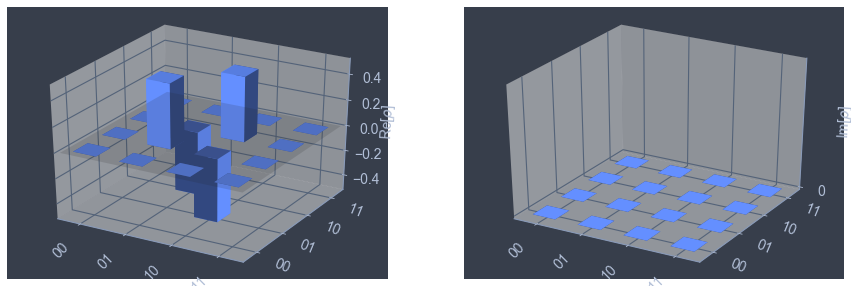

In [10]:
plot_state_city(outstate4)

Notice that we have now standard simple circuits to generate the 4 bell states. An interesting thing to do now would be to create a superposition of these states with equal probability, but that is merely the state $|\psi \rangle=\frac{1}{\sqrt{2}}(|00\rangle+|01\rangle)=\frac{1}{\sqrt{2}}|0\rangle(|0\rangle+|1\rangle)$, so if we start with this and intend to measure in the bell basis we should have equal counts on all four states. Let's dive in next on the subject of measurement on the Bell state.

## How to measure in the Bell basis?

[Resource0](https://quantumcomputing.stackexchange.com/questions/9115/measuring-in-an-arbitrary-basis)

[Resource1](https://github.com/Qiskit/iqx-user-guide/blob/master/rst/full-user-guide/003-Multiple_Qubits_Gates_and_Entangled_States/002-Entanglement_and_Bell_Tests.rst)

[Resource2](https://render.githubusercontent.com/view/ipynb?commit=ae10927b3b10c3d137fedbfef83bf8d778370ccb&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f5169736b69742f7169736b69742d6971782d7475746f7269616c732f616531303932376233623130633364313337666564626665663833626638643737383337306363622f7169736b69742f66756e64616d656e74616c732f315f67657474696e675f737461727465645f776974685f7169736b69742e6970796e62&nwo=Qiskit%2Fqiskit-iqx-tutorials&path=qiskit%2Ffundamentals%2F1_getting_started_with_qiskit.ipynb&repository_id=99244384&repository_type=Repository#simulation)

In [11]:
"""Let's start again with our bell state of circuit 1"""
circuit1.data = []  # Clear your circuit
circuit1.h(0)
circuit1.cx(0, 1)
circuit1.barrier()
circuit1.cx(0, 1)
circuit1.h(0)
circuit1.measure(0, 0)
circuit1.measure(1, 1)

circuit1.draw()

┌───┐      ░      ┌───┐┌─┐
q0_0: |0>┤ H ├──■───░───■──┤ H ├┤M├
         └───┘┌─┴─┐ ░ ┌─┴─┐└┬─┬┘└╥┘
q0_1: |0>─────┤ X ├─░─┤ X ├─┤M├──╫─
              └───┘ ░ └───┘ └╥┘  ║ 
 c0_0: 0 ════════════════════╬═══╩═
                             ║     
 c0_1: 0 ════════════════════╩═════

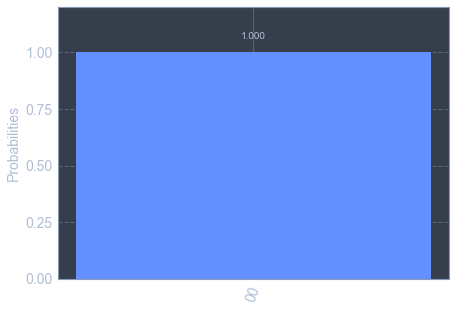

In [12]:
qasm_sim = Aer.get_backend("qasm_simulator")
results1 = execute(circuit1, backend=qasm_sim, shots=1024).result()
counts = results1.get_counts()
plot_histogram(counts)

How should we then proceed based on this result? We could try to figure out a cicuit that would implement the following operator:

$$
U=|00\rangle \langle\Phi^+|+|10\rangle \langle \Phi^-|+|01\rangle \langle \Psi^+|+ |11\rangle \langle \Psi^-|
$$

this way we get a mapping:
$$
|\Phi^+\rangle \to |00\rangle \\
|\Phi^-\rangle \to |01\rangle \\
|\Psi^+\rangle \to |10\rangle \\
|\Psi^-\rangle \to |11\rangle \\
$$

and if, for example we had a result of half the counts on the $|00\rangle$ and other half in $|11\rangle$ then we knew that the state prior to this transformation was something like $\frac{1}{\sqrt{2}}\big(|\Phi^+\rangle +|\Psi^-\rangle \big)$, thus we, in practice, just performed a measurement in the bell basis. This map is accomplished by placing a CNOT on qubit 1 as target and control qubit 0 folowed by a Hadamard on qubit 0 and finally the measurements.

In [13]:
# little code snippet for matrix calculations
cnot = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]
])
x = np.array([
    [0, 1],
    [1, 0]
])
x1 = np.kron(x, np.eye(2))
x2 = np.kron(np.eye(2), x)
h = (1/np.sqrt(2))*np.array([
    [1, 1],
    [1, -1]
])
h1 = np.kron(h, np.eye(2))

phi_plus = np.matmul(h1, cnot)

print(phi_plus)
print(np.dot(phi_plus, [1, 0, 0, 1]/np.sqrt(2)))  # it works
print(np.dot(phi_plus, [0, 1, 1, 0]/np.sqrt(2)))  # it works
print(np.dot(phi_plus, [1, 0, 0, -1]/np.sqrt(2)))  # it works
print(np.dot(phi_plus, [0, 1, -1, 0]/np.sqrt(2)))  # it works

[[ 0.70710678  0.          0.          0.70710678]
 [ 0.          0.70710678  0.70710678  0.        ]
 [ 0.70710678  0.          0.         -0.70710678]
 [ 0.          0.70710678 -0.70710678  0.        ]]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]


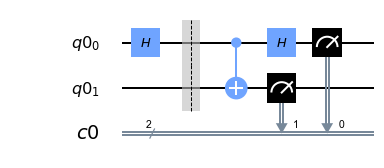

In [14]:
circuit1.data = []  # Clear your circuit
circuit1.h(0)
circuit1.barrier()
circuit1.cx(0, 1)
circuit1.h(0)
circuit1.measure(0, 0)
circuit1.measure(1, 1)

circuit1.draw(output="mpl")

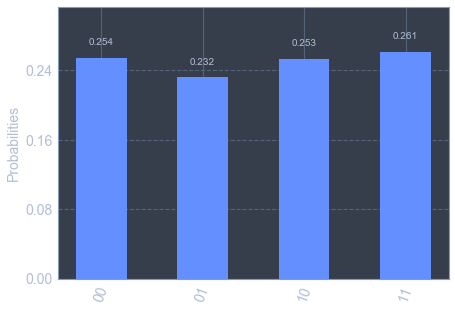

In [15]:
results1 = execute(circuit1, backend=qasm_sim, shots=1024).result()
counts = results1.get_counts()
plot_histogram(counts)

The results are as expected from the final conclusions from 1.1. We are now in the conditions of performing a teleportation.

## How to perform a teleportation?

The goal of a teleportation is to transfer the information of the quantum state of a qubit without physically transporting it. Suppose two persons share two entangled qubits on one of the bell states (say $|\Phi^+\rangle$) and after that, they distance themselves (physically). Let's call these people Alice and Bob (_how original_). Alice then gets an extra qubit in some state $|\psi\rangle$. I won't get into the proof here, but this follows very closely what is stated on [Wikipedia](https://en.wikipedia.org/wiki/Quantum_teleportation). Very briefly, after taking into account the 3 qubit state space and changing basis of the state space of Alice's two qubits (tecnically we performed a change of basis on the whole state space) we can see that a measurement on the bell basis of her qubits can, after sending the result of the measurement to Bob, allow him to get the same information as the qubit $|\psi \rangle$ that Alice had.

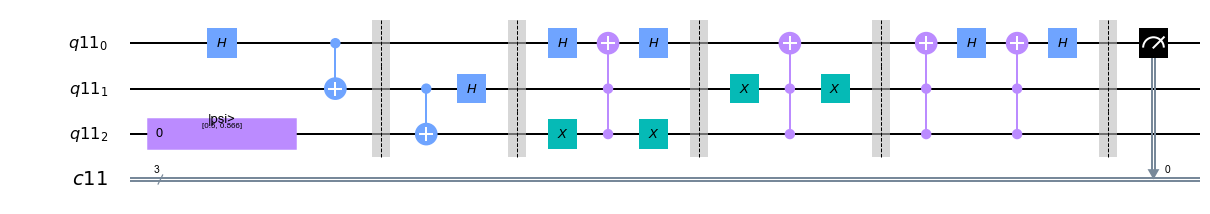

In [43]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
circ = QuantumCircuit(q, c)

circ.h(0)
circ.cx(0, 1)
psi = [np.sqrt(1/4), np.sqrt(3/4)]
circ.initialize(psi, q[2])
circ.barrier()
# We have created Bob and Alice's entangled shared qubit (Bob is qubit 0 and Alice is qubit 1 and 2)

circ.cx(1, 2)
circ.h(1)
circ.barrier()
# We have performed a measurement in the bell basis according to the map explained in 1.2
# Now we are left with implementing all the conditional operations based on the outcome of the measurements
# Lets separate by barriers the three different controled operations
circ.x(2)
circ.h(0)
circ.ccx(2, 1, 0)
circ.h(0)
circ.x(2)
circ.barrier()

circ.x(1)
circ.ccx(2, 1, 0)
circ.x(1)
circ.barrier()


circ.ccx(2, 1, 0)
circ.h(0)
circ.ccx(2, 1, 0)
circ.h(0)

circ.barrier()



circ.measure(0, 0)
circ.draw(output="mpl")

How it works:

1 - We create a Bell state shared by Alice (q1) and Bob (q0), $|\Phi^+\rangle$ and initialize the qubit to teleport (q2);

2- It was proven in 1.2 that a cnot followed by a Hadamard performs the transformation:
$$
|\Phi^+\rangle \to |00\rangle \\
|\Phi^-\rangle \to |01\rangle \\
|\Psi^+\rangle \to |10\rangle \\
|\Psi^-\rangle \to |11\rangle \\
$$

Let the subscripts _A,B,C_ denote the state space that some ket belongs.[It can be proven](https://en.wikipedia.org/wiki/Quantum_teleportation) that the 3qubit state can be written  as (Check notebook):

$$
|\psi\rangle_C|\Phi^+\rangle=\frac{1}{2}\bigg\{ |\Phi^+\rangle_{AC} \hat{1}|\psi \rangle_B+|\Phi^-\rangle_{AC} \hat{Z}|\psi \rangle_B+|\Psi^+\rangle_{AC} \hat{X}|\psi \rangle_B+|\Psi^-\rangle_{AC} i\hat{Y}|\psi \rangle_B \bigg\}
$$

Thus on the second snippet of gates we simply have a map that in practice "encodes" the bell basis according to the above relations and so we can make so controled operations on the bell basis, which is analogous to the "if" statements on classical logic.

3 - It's for the case when we have $|\Phi^-\rangle$ and we have to apply a Z gate which is just $HXH$ and it should only act when it is mapped to $|01\rangle$;

4 - It's for the case when we have $|\Psi^+\rangle$ and we have to apply an X gate and it should only act when it is mapped to $|10\rangle$;

5 - It's for the case when we have $|\Psi^-\rangle$ and we have to apply a iY gate which is just $XZ=XHXH$ and it should only act when it is mapped to $|11\rangle$;

all that is left is measurement.



{'001': 7491, '000': 2533}


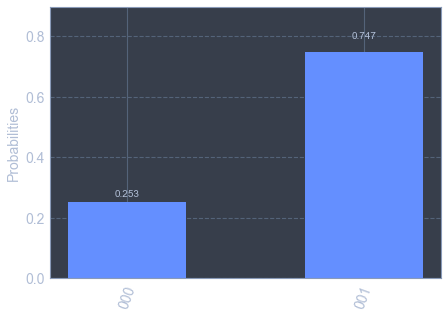

In [44]:
result = execute(circ, backend=qasm_sim, shots=10024).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

As you can see it works like a charm.

EDIT 12/03

What we actually ended up doing was a SWAP operation, and NOT a teleportation. How could Bob perform controlled operations on his qubit if the control qubits were Alice's, since they were VERY far apart? Teleportation requires sending the result of Alice's measurement to Bob. We can test this by measuring qubit's 1 and 2 (Alice's qubits).

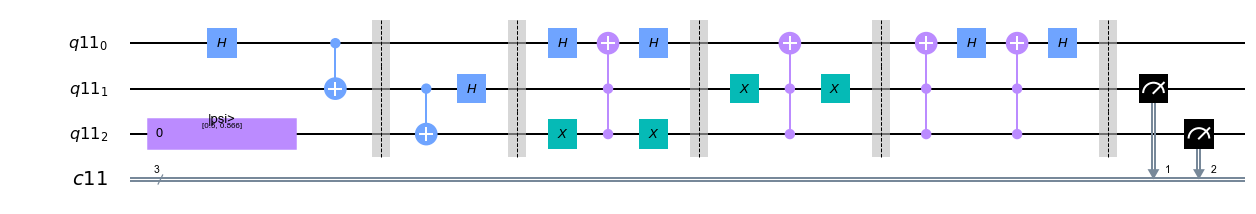

In [45]:
circ.data.pop(-1) #remove the last measurement
circ.measure(1,1)
circ.measure(2,2)
circ.draw(output="mpl")

{'110': 2470, '010': 2424, '100': 2533, '000': 2597}


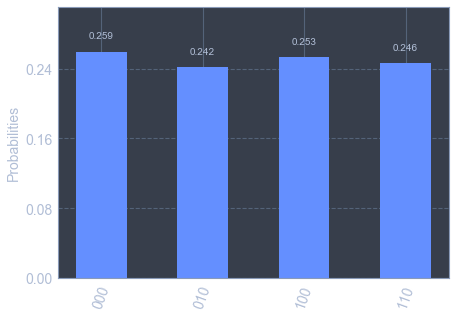

In [46]:
result = execute(circ, backend=qasm_sim, shots=10024).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

Essentially this tells us that both of Allice's are in an hadamard state which was the initial state of Bob's qubit. To correct this we will have to resort to conditional operators on the classical register.

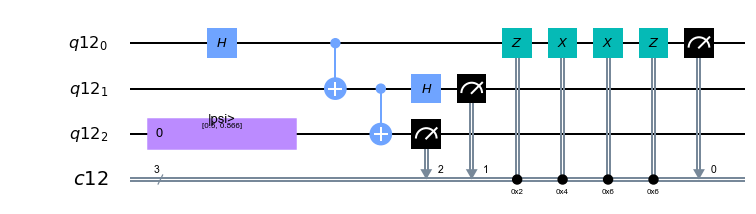

In [47]:
q1 = QuantumRegister(3)
c1 = ClassicalRegister(3)
teleport = QuantumCircuit(q1, c1)

teleport.h(0)
teleport.cx(0, 1)
psi = [np.sqrt(1/4), np.sqrt(3/4)]
teleport.initialize(psi, 2)

teleport.cx(1, 2)
teleport.h(1)
teleport.measure(1, 1)
teleport.measure(2, 2)

teleport.z(0).c_if(c1, 2)
teleport.x(0).c_if(c1, 4)
teleport.x(0).c_if(c1, 6)
teleport.z(0).c_if(c1, 6)

teleport.measure(0, 0)
teleport.draw(output="mpl")

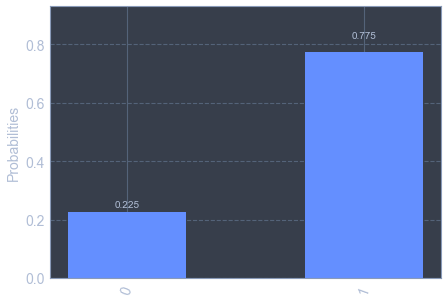

In [48]:
result = execute(teleport, backend=qasm_sim, shots=1024).result()
counts = result.get_counts()
n0 = 0
n1 = 0
for i in counts:
    if int(i[-1]) == 0:
        n0 += counts[i]
    else:
        n1 += counts[i]

results = {"0": n0, "1": n1}
plot_histogram(results)

Now we have successfully executed a teleportation.

What are the major differences between both circuits? Is the first one useful in any way? 

Let's some of the properties of the first circuit. First we will create the same circuit but without the barriers

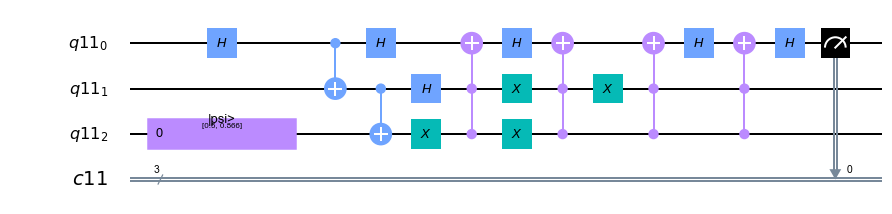

In [50]:
circ.data=[]
circ.h(0)
circ.cx(0, 1)
psi = [np.sqrt(1/4), np.sqrt(3/4)]
circ.initialize(psi, q[2])
circ.cx(1, 2)
circ.h(1)
circ.x(2)
circ.h(0)
circ.ccx(2, 1, 0)
circ.h(0)
circ.x(2)
circ.x(1)
circ.ccx(2, 1, 0)
circ.x(1)
circ.ccx(2, 1, 0)
circ.h(0)
circ.ccx(2, 1, 0)
circ.h(0)



circ.measure(0, 0)
circ.draw(output="mpl")

In [64]:
print("Operations: ",circ.count_ops())
print("Number of operations: ", circ.size())
print("Circuit Depth: ", circ.depth())
print("Number of unitary factors:", circ.num_unitary_factors())
print("Depth of decomposed circuit: ",circ.decompose().depth())
print("Number of unitary factors in decomposed circuit:", circ.decompose().num_unitary_factors())

Operations:  OrderedDict([('h', 6), ('x', 4), ('ccx', 4), ('cx', 2), ('initialize', 1), ('measure', 1)])
Number of operations:  18
Circuit Depth:  13
Number of unitary factors: 1
Depth of decomposed circuit:  48
Number of unitary factors in decomposed circuit: 1


### How do the classically controled operations work?

The value of the classical register c is interpreted as a number in binary. Thus, c_if(c,3) means c[0]==1 and c[1]==1. If you want c[0]==0 and c[1]==1, the condition is c_if(c,2)

# Entropy 

## Entropy measures

[Resource0](https://physics.stackexchange.com/questions/141321/what-is-the-conceptual-difference-between-gibbs-and-boltzmann-entropies)

[Resource1](https://www.scottaaronson.com/qclec/11.pdf)

[Resource2](https://towardsdatascience.com/entropy-is-a-measure-of-uncertainty-e2c000301c2c)



Key points to take on entanglement measures:[Link](https://physics.stackexchange.com/questions/322317/why-are-there-so-many-different-measures-of-entanglement)

1 - Von Neuman entropy is simply the generalization of the Gibbs entropy for the quantum world and (though risking oversimplification) it measures the uncertainty of a given quantum state, that is, if we know _exactly_ the quantum state of a system then there is no uncertainty and thus the entropy associated to it is 0, thus, the Von Neuman entropy for any pure state is always 0 and for any bell pair is always 1. This concept is generalized for any dimension as:
$$ S(\rho)=-Tr (\rho \ln \rho)$$

2 - Entropy of formation answers the question:  Given maximally entangled states (if they exist) and separable states, how much "entanglement" is there to be distributed to different states? Given another state, how many of these states can I produce with an entangled state. In the limit of infinitely many copies, this is known as the entanglement of formation (extracted from the link)

3 - Mutual information measures the entropy generated when we trace out a bipartite system, but discount the preexisting entropy. That is, suppose you had a system AB that you were 80% sure what its state was. Now you trace your system leaving you with even more uncertain of the total initial system (say you are 30% sure of the system). But the process of tracing out a subsystem only increased the entropy, and this measure quantifies this _increase_ and not the total entropy.

4 - Concurrence gives you an idea of _how close_ your system is to a maximally entangled state.

In [22]:
circuit=QuantumCircuit(2,2)

circuit.h(0)
circuit.cx(0,1)

circuit.draw()

┌───┐     
q_0: |0>┤ H ├──■──
        └───┘┌─┴─┐
q_1: |0>─────┤ X ├
             └───┘
 c_0: 0 ══════════
                  
 c_1: 0 ══════════

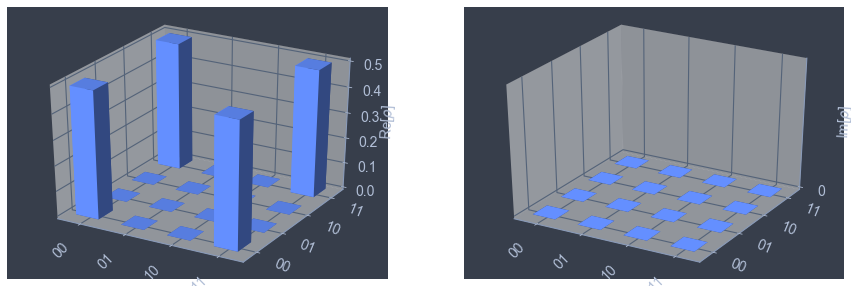

In [23]:
result=execute(circuit,backend=state_sim).result()
outstate=result.get_statevector()
plot_state_city(outstate)

In [24]:

print('entropy:',qiskit.quantum_info.entropy(outstate))
print('Concurrence:',qiskit.quantum_info.concurrence(outstate))
print("Entanglement of formation: ", qiskit.quantum_info.entanglement_of_formation(outstate))

entropy: 0
Concurrence: 0.9999999999999998
Entanglement of formation:  0.9999999999999999


In [25]:
# Create a Quantum Circuit acting on a quantum register of 2 qubits and 2 
q = QuantumRegister(3)
c = ClassicalRegister(3)

circuit4 = QuantumCircuit(q,c)
p0=0.2
p1=1-p0

desired_vector = [
    np.sqrt(p0) * complex(1, 0),
    0,
    np.sqrt(p1/2) * complex(1, 0),
    np.sqrt(p1/2) * complex(1, 0),
    0,
    0,
    0,
    0]

circuit4.initialize(desired_vector, [q[0],q[1],q[2]])

# Add a CX (CNOT) gate on control qubit 1 and target qubit 2, putting
# the qubits in a Bell state.
circuit4.cx(1, 2)
circuit4.barrier()
#https://quantumcomputing.stackexchange.com/questions/8369/what-is-a-barrier-in-qiskit-circuits



circuit4.draw()


┌────────────────────────────────────────────────┐      ░ 
q6_0: |0>┤0                                               ├──────░─
         │                                                │      ░ 
q6_1: |0>┤1 Initialize(0.44721,0,0.63246,0.63246,0,0,0,0) ├──■───░─
         │                                                │┌─┴─┐ ░ 
q6_2: |0>┤2                                               ├┤ X ├─░─
         └────────────────────────────────────────────────┘└───┘ ░ 
 c6_0: 0 ══════════════════════════════════════════════════════════
                                                                   
 c6_1: 0 ══════════════════════════════════════════════════════════
                                                                   
 c6_2: 0 ══════════════════════════════════════════════════════════

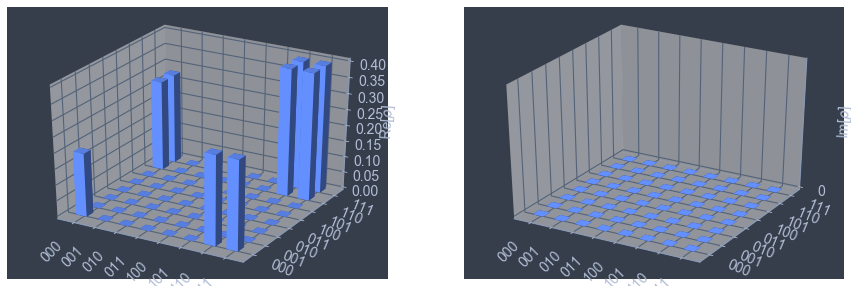

In [26]:
result=execute(circuit4,backend=state_sim).result()
outstate=result.get_statevector()
stateA=quantum_info.partial_trace(outstate,[0,1])
stateB=quantum_info.partial_trace(outstate,[0,2])
plot_state_city(outstate)

In [27]:
print('entropyAB:',qiskit.quantum_info.entropy(outstate))
print('entropyA:',qiskit.quantum_info.entropy(stateA))
print('entropyB:',qiskit.quantum_info.entropy(stateB))

# print('Concurrence:',qiskit.quantum_info.concurrence(outstate))
# print("Entanglement of formation: ", qiskit.quantum_info.entanglement_of_formation(outstate))

entropyAB: 0
entropyA: 0.7219280948873623
entropyB: 0.7219280948873623


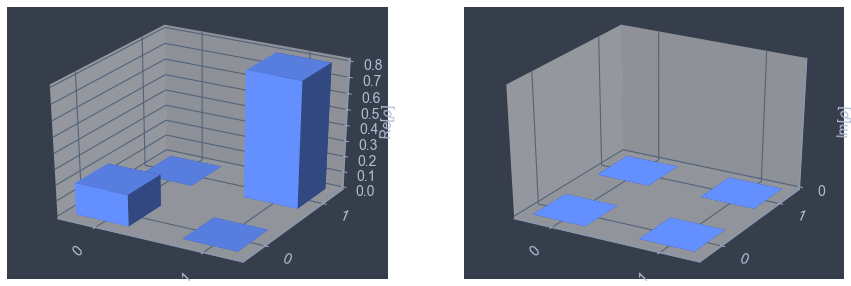

In [28]:
plot_state_city(stateA.data)

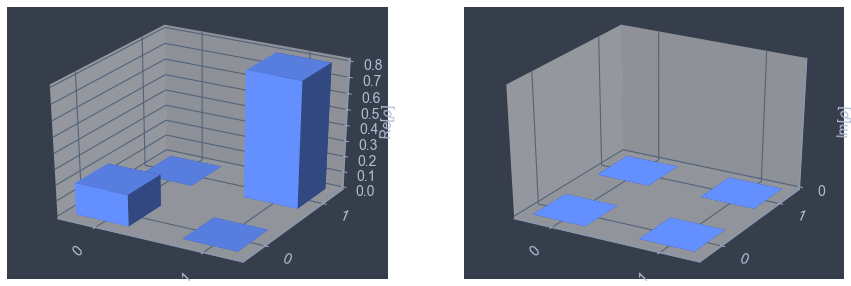

In [29]:
plot_state_city(stateB.data)